In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/Users/agajanagamyradov/Downloads/Spotify_Youtube.csv')
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
spotify_list=df.copy()

In [10]:
spotify_list.drop(columns=['Url_spotify','Url_youtube','Description','Key'],inplace=True)

In [12]:
spotify_list.dropna(inplace=True)

In [15]:
duplicate=spotify_list.duplicated(subset='Track',keep=False)
duplicate.value_counts()

False    14881
True      4668
dtype: int64

In [20]:
spotify=spotify_list.drop_duplicates(subset='Track')

In [22]:
spotify['Artist'].unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent', ...,
       'Grupo Frontera', 'LE SSERAFIM', 'SICK LEGEND'], dtype=object)

In [23]:
spotify['Album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [42]:
spotify_group=spotify.groupby('Album_type').sum().loc[:,['Views','Stream','Likes','Comments']]


,Views,Stream,Likes,Comments
Album_type,,,,
album,1.154319e+12,1.802757e+12,7.583822e+09,322617209.0
compilation,4.607030e+10,5.104499e+10,2.926442e+08,9802794.0
single,2.799964e+11,3.392983e+11,2.416506e+09,96630571.0


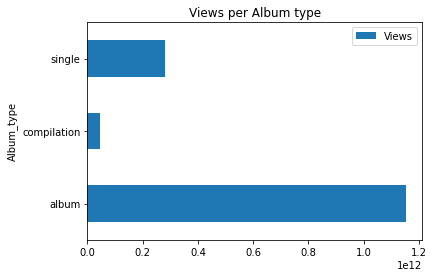

In [41]:
spotify_group.plot(y='Views',kind='barh')
plt.title('Views per Album type')
plt.show()

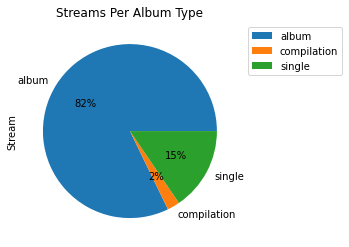

In [59]:
spotify_group.plot(y='Stream',kind='pie',autopct='%1.0f%%',title='Streams Per Album Type').legend(bbox_to_anchor=(1.5,1))
plt.show()

In [65]:
top5=spotify.sort_values('Views',ascending=False).head().loc[:,['Track','Views','Artist']]
top5.set_index('Artist',inplace=True)

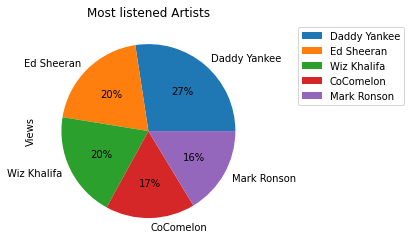

In [110]:
top5.plot(y='Views',kind='pie',autopct='%1.0f%%',title='Most listened Artists')
plt.legend(bbox_to_anchor=(1.7,1))
plt.show()

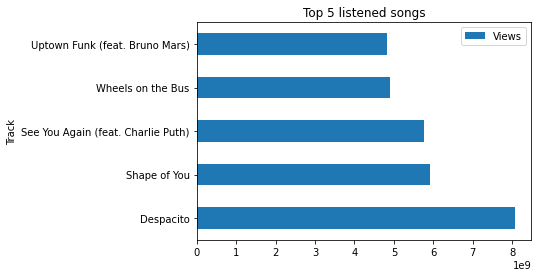

In [101]:
top5.plot(x='Track',y='Views',kind='barh',title='Top 5 listened songs')
plt.show()